In [1]:
import pandas as pd
import seaborn as sns

sns.set()

data = pd.read_csv('data/train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
X = data.copy()
y = X.pop("Survived")

In [3]:
X.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


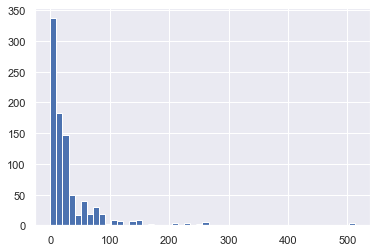

In [4]:
X['Fare'].hist(bins=50);

Name column is irrelevant, as well as ticket number

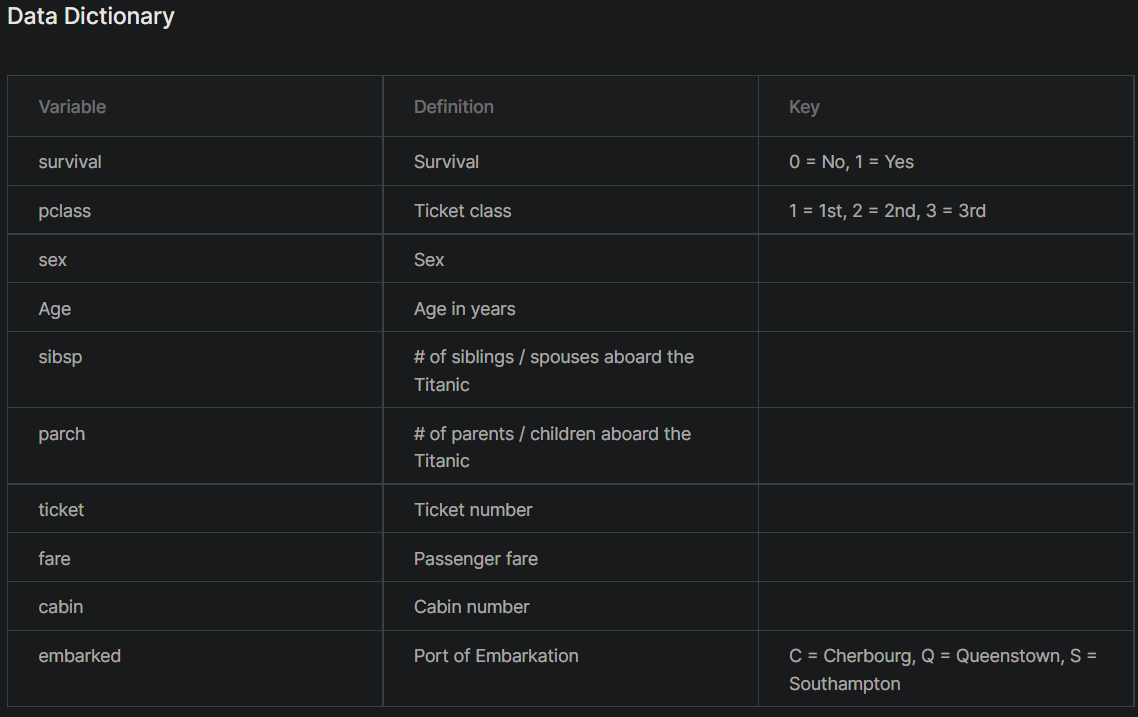

Will also join SibSP and Parch into a single family column

In [5]:
X.drop(["Name", "Ticket", "PassengerId"],axis=1,inplace=True)

In [6]:
X.isnull().sum()

Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [7]:
X['Age'].mean()

29.69911764705882

In [8]:
X['Age'].fillna(30, inplace=True)

Also dropping cabin as it is null at around 80% of the data (!!)

In [9]:
X.drop(["Cabin"],axis=1,inplace=True)

In [10]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [11]:
X.shape

(891, 7)

In [12]:
rows_dropped = X[X["Embarked"].isnull()].index #dropping 2 null embarked rows
X.drop(rows_dropped,inplace=True)

In [13]:
X.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [14]:
X['Family'] = X.SibSp + X.Parch
X.drop(['SibSp','Parch'],axis=1,inplace=True)

Onehotencoder for embark, 

In [15]:
X['Sex'].unique()

array(['male', 'female'], dtype=object)

In [16]:
X['Sex'].replace({'male':0,'female':1}, inplace=True)

In [17]:
X.head()

,Pclass,Sex,Age,Fare,Embarked,Family
0,3,0,22.0,7.2500,S,1
1,1,1,38.0,71.2833,C,1
2,3,1,26.0,7.9250,S,0
3,1,1,35.0,53.1000,S,1
4,3,0,35.0,8.0500,S,0


In [18]:
from sklearn.preprocessing import OneHotEncoder

onehot = OneHotEncoder(sparse=False).fit_transform(X[['Embarked']])

In [19]:
X = pd.concat([X,pd.DataFrame(onehot)], axis=1)

In [20]:
X.drop('Embarked',axis=1, inplace=True)
X

,Pclass,Sex,Age,Fare,Family,0,1,2
0,3.0,0.0,22.0,7.2500,1.0,0.0,0.0,1.0
1,1.0,1.0,38.0,71.2833,1.0,1.0,0.0,0.0
2,3.0,1.0,26.0,7.9250,0.0,0.0,0.0,1.0
3,1.0,1.0,35.0,53.1000,1.0,0.0,0.0,1.0
4,3.0,0.0,35.0,8.0500,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
888,3.0,1.0,30.0,23.4500,3.0,0.0,1.0,0.0
889,1.0,0.0,26.0,30.0000,0.0,NaN,NaN,NaN
890,3.0,0.0,32.0,7.7500,0.0,NaN,NaN,NaN
61,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0


In [21]:
y.drop(rows_dropped,inplace=True)

In [23]:
from sklearn.preprocessing import StandardScaler

X = pd.DataFrame(StandardScaler().fit_transform(X));

Summarizing data engineering process into a single function in model file